# 1. Importing the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Senior_Thesis_Waseda')

In [ ]:
from IPython.display import display, HTML
import numpy as np
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LogisticRegression


In [ ]:
df = pd.read_csv('WVS_Cross-National_Wave_7_inverted_csv_v6_0.csv', low_memory=False)
print(df.head())

              version                        doi  A_WAVE  A_YEAR  A_STUDY  \
0  6-0-0 (2024-04-30)  doi.org/10.14281/18241.24       7    2019        2   
1  6-0-0 (2024-04-30)  doi.org/10.14281/18241.24       7    2019        2   
2  6-0-0 (2024-04-30)  doi.org/10.14281/18241.24       7    2019        2   
3  6-0-0 (2024-04-30)  doi.org/10.14281/18241.24       7    2019        2   
4  6-0-0 (2024-04-30)  doi.org/10.14281/18241.24       7    2019        2   

   B_COUNTRY B_COUNTRY_ALPHA  C_COW_NUM C_COW_ALPHA  D_INTERVIEW  ...  \
0        196             CYP        352         CYP    196070011  ...   
1        196             CYP        352         CYP    196070036  ...   
2        196             CYP        352         CYP    196070039  ...   
3        196             CYP        352         CYP    196070040  ...   
4        196             CYP        352         CYP    196070053  ...   

   WVS_Polmistrust_PartyVoter  WVS_LR_MedianVoter  WVS_LibCon_MedianVoter  \
0                    

In [ ]:
print(df['Q_MODE'].value_counts())

Q_MODE
1    47595
2    33139
3    11511
4     4815
6       86
5       74
Name: count, dtype: int64


# 2. Cleaning the datasets

## 2.1. Delete the not-objective variables

In [ ]:
df.describe()

,A_WAVE,A_YEAR,A_STUDY,B_COUNTRY,C_COW_NUM,D_INTERVIEW,S007,J_INTDATE,FW_START,FW_END,...,WVS_Polmistrust_PartyVoter,WVS_LR_MedianVoter,WVS_LibCon_MedianVoter,v2psbars,v2psorgs,v2psprbrch,v2psprlnks,v2psplats,v2xnp_client,v2xps_party
count,97220.0,97220.000000,97220.0,97220.000000,97220.000000,9.722000e+04,9.722000e+04,9.722000e+04,97220.000000,97220.000000,...,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000
mean,7.0,2019.132082,2.0,447.872146,476.555153,4.479431e+08,4.485726e+08,1.905207e+07,201901.606881,201919.989683,...,67.689823,-331.856360,-331.510837,-334.689260,-334.827539,-335.095391,-334.788026,-334.811147,-335.648640,-335.268652
std,0.0,1.601004,0.0,256.491312,288.386918,2.564912e+08,2.564602e+08,4.658281e+06,160.980181,160.412353,...,9.814691,474.786005,475.033906,472.769807,472.671155,472.481026,472.700209,472.683543,472.086732,472.357142
min,7.0,2017.000000,2.0,20.000000,2.000000,2.007000e+07,2.072000e+07,-5.000000e+00,201701.000000,201703.000000,...,43.750000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
25%,7.0,2018.000000,2.0,218.000000,201.000000,2.180700e+08,2.187200e+08,2.018022e+07,201804.000000,201806.000000,...,66.964286,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
50%,7.0,2018.000000,2.0,422.000000,552.000000,4.220707e+08,4.227207e+08,2.018111e+07,201811.000000,201812.000000,...,68.210839,5.420000,5.083400,0.552000,0.869000,-0.403000,-0.107000,-0.099000,0.059000,0.591000
75%,7.0,2020.000000,2.0,688.000000,714.000000,6.880703e+08,6.887203e+08,2.020041e+07,202003.000000,202010.000000,...,74.000000,5.650000,6.512500,2.043000,1.737000,1.676000,2.525000,2.354000,0.459000,0.927000
max,7.0,2023.000000,2.0,909.000000,920.000000,9.090704e+08,9.090704e+08,2.023070e+07,202306.000000,202307.000000,...,83.705786,7.260000,9.402100,2.407000,1.737000,1.676000,2.525000,2.354000,0.624000,0.927000


In [ ]:
column_names = df.columns.tolist()

# find the index of 'Q290'
q290_index = column_names.index('Q290')

# slice the column names list up to and including 'Q290'
selected_columns = column_names[:q290_index + 1]

# create a new DataFrame with only the selected columns
df_subset = df[selected_columns]

# print the head of the new DataFrame to verify
print(df_subset.head())

              version                        doi  A_WAVE  A_YEAR  A_STUDY  \
0  6-0-0 (2024-04-30)  doi.org/10.14281/18241.24       7    2019        2   
1  6-0-0 (2024-04-30)  doi.org/10.14281/18241.24       7    2019        2   
2  6-0-0 (2024-04-30)  doi.org/10.14281/18241.24       7    2019        2   
3  6-0-0 (2024-04-30)  doi.org/10.14281/18241.24       7    2019        2   
4  6-0-0 (2024-04-30)  doi.org/10.14281/18241.24       7    2019        2   

   B_COUNTRY B_COUNTRY_ALPHA  C_COW_NUM C_COW_ALPHA  D_INTERVIEW  ...  Q283  \
0        196             CYP        352         CYP    196070011  ...     9   
1        196             CYP        352         CYP    196070036  ...    10   
2        196             CYP        352         CYP    196070039  ...     6   
3        196             CYP        352         CYP    196070040  ...     9   
4        196             CYP        352         CYP    196070053  ...     9   

   Q284  Q285  Q286  Q287P  Q288  Q288R  Q289   Q289CS9    Q29

In [ ]:
# Get the column names of the df_subset DataFrame
columns_list = df_subset.columns.tolist()

# Create an HTML table string
html_table = "<table><tr><th>Column Names</th></tr>"
for col in columns_list:
    html_table += f"<tr><td>{col}</td></tr>"
html_table += "</table>"

# Display the HTML table
display(HTML(html_table))


Column Names
version
doi
A_WAVE
A_YEAR
A_STUDY
B_COUNTRY
B_COUNTRY_ALPHA
C_COW_NUM
C_COW_ALPHA
D_INTERVIEW


In [ ]:
# Deleting the variables unneccesary to the experiment
columns_to_drop = ['version', 'doi', 'A_WAVE', 'A_YEAR', 'A_STUDY', 'B_COUNTRY', 'C_COW_NUM', 'C_COW_ALPHA', 'S007', 'J_INTDATE', 'FW_START', 'FW_END', 'K_TIME_START', 'K_TIME_END', 'K_DURATION', 'Q_MODE', 'N_REGION_ISO', 'N_REGION_WVS', 'N_REGION_NUTS2', 'N_REGION_NUTS1', 'N_TOWN', 'G_TOWNSIZE2', 'H_URBRURAL', 'I_PSU', 'Q33_3', 'Q34_3', 'Q35_3','O1_LONGITUDE', 'O2_LATITUDE', 'L_INTERVIEWER_NUMBER', 'S_INTLANGUAGE', 'LNGE_ISO', 'E_RESPINT', 'F_INTPRIVACY', 'E1_LITERACY', 'W_WEIGHT', 'S018', 'PWGHT', 'S025', 'Q82_AFRICANUNIONP','Q82_APECP','Q82_ARABLEAGUEP','Q82_ASEANP','Q82_CISP','Q82_CUSMAP','Q82_ECOP','Q82_EUP','Q82_GULFCOOPP','Q82_ISLCOOPP','Q82_MERCOSURP','Q82_NAFTAP','Q82_OASP','Q82_SAARCP','Q82_SCOP','Q82_TLCP','Q82_UNDPP','Q83P','Q84P','Q85P','Q86P','Q87P','Q88P','Q89P','Q90','Q91','Q92','Q93','Q94R','Q95R','Q96R','Q97R','Q98R','Q99R','Q100R','Q101R','Q102R','Q103R','Q104R','Q105R','Q149', 'Q150','Q152','Q153','Q154','Q155','Q156','Q157','Q174','Q175','Q172R','Q223','Q223_ABREV','Q223_LOCAL','Q261','Q262','X003R2','Q266','X002_02B','Q267','V002A_01','Q268','V001A_01','Q272','Q275A','Q276','Q276A','Q275R','Q276R','Q277A','Q277R','Q278A','Q278R','Q280','Q282','Q283','Q288R','Q289CS9','Q290']
df_cleaned_1 = df_subset.drop(columns=columns_to_drop)
print(df_cleaned_1.head)

<bound method NDFrame.head of       B_COUNTRY_ALPHA  D_INTERVIEW  G_TOWNSIZE  H_SETTLEMENT  Q1P  Q2P  Q3P  \
0                 CYP    196070011           6             4    4    4    4   
1                 CYP    196070036           6             4    4    2    4   
2                 CYP    196070039           6             4    4    3    4   
3                 CYP    196070040           6             4    4    3    4   
4                 CYP    196070053           6             4    4   -1    3   
...               ...          ...         ...           ...  ...  ...  ...   
97215             NIR    909070269           7             5    4    3    3   
97216             NIR    909070299           5             4    4    4    3   
97217             NIR    909070309           6             3    4    3    3   
97218             NIR    909070353           6             5    4    3    3   
97219             NIR    909070447           5             5    4    4    4   

       Q4P  Q5P  Q6P 

In [ ]:
# list column of df_cleaned_1 so that it is easy to see for me

print(df_cleaned_1.columns.tolist())

['B_COUNTRY_ALPHA', 'D_INTERVIEW', 'G_TOWNSIZE', 'H_SETTLEMENT', 'Q1P', 'Q2P', 'Q3P', 'Q4P', 'Q5P', 'Q6P', 'Q7P', 'Q8P', 'Q9P', 'Q10P', 'Q11P', 'Q12P', 'Q13P', 'Q14P', 'Q15P', 'Q16P', 'Q17P', 'Q18P', 'Q19P', 'Q20P', 'Q21P', 'Q22P', 'Q23P', 'Q24P', 'Q25P', 'Q26P', 'Q27P', 'Q28P', 'Q29P', 'Q30P', 'Q31P', 'Q32P', 'Q33P', 'Q34P', 'Q35P', 'Q36P', 'Q37P', 'Q38P', 'Q39P', 'Q40P', 'Q41P', 'Q42', 'Q43P', 'Q44P', 'Q45P', 'Q46P', 'Q47P', 'Q48', 'Q49', 'Q50', 'Q51P', 'Q52P', 'Q53P', 'Q54P', 'Q55P', 'Q56P', 'Q57P', 'Q58P', 'Q59P', 'Q60P', 'Q61P', 'Q62P', 'Q63P', 'Q64P', 'Q65P', 'Q66P', 'Q67P', 'Q68P', 'Q69P', 'Q70P', 'Q71P', 'Q72P', 'Q73P', 'Q74P', 'Q75P', 'Q76P', 'Q77P', 'Q78P', 'Q79P', 'Q80P', 'Q81P', 'Q82P', 'Q94', 'Q95', 'Q96', 'Q97', 'Q98', 'Q99', 'Q100', 'Q101', 'Q102', 'Q103', 'Q104', 'Q105', 'Q106', 'Q107', 'Q108', 'Q109', 'Q110', 'Q111', 'Q112', 'Q113', 'Q114', 'Q115', 'Q116', 'Q117', 'Q118', 'Q119P', 'Q120', 'Q121', 'Q122', 'Q123', 'Q124', 'Q125', 'Q126', 'Q127', 'Q128', 'Q129', 'Q130P', 

In [ ]:
df_cleaned_1.describe()

,D_INTERVIEW,G_TOWNSIZE,H_SETTLEMENT,Q1P,Q2P,Q3P,Q4P,Q5P,Q6P,Q7P,...,Q277,Q278,Q279,Q281,Q284,Q285,Q286,Q287P,Q288,Q289
count,9.722000e+04,97220.000000,97220.000000,97220.000000,97220.000000,97220.000000,97220.000000,97220.000000,97220.000000,97220.000000,...,97220.000000,97220.000000,97220.000000,97220.000000,97220.000000,97220.000000,97220.000000,97220.000000,97220.000000,97220.000000
mean,4.479431e+08,5.144888,3.082586,3.875684,3.272269,3.184355,2.349671,3.359587,2.959761,0.761839,...,1.447038,1.552211,3.047192,3.556089,0.723154,1.391432,1.910183,2.425057,4.700483,2.793222
std,2.564912e+08,2.689833,1.538648,0.464428,0.817833,0.895517,1.083773,1.070059,1.221137,0.475764,...,2.486612,2.612624,2.154336,3.370270,2.039342,1.013446,1.150535,1.685923,2.383291,2.631263
min,2.007000e+07,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,...,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000
25%,2.180700e+08,3.000000,2.000000,4.000000,3.000000,3.000000,2.000000,3.000000,2.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,0.000000
50%,4.220707e+08,6.000000,3.000000,4.000000,3.000000,3.000000,2.000000,4.000000,3.000000,1.000000,...,1.000000,1.000000,3.000000,4.000000,2.000000,2.000000,2.000000,3.000000,5.000000,2.000000
75%,6.880703e+08,8.000000,5.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,1.000000,...,3.000000,3.000000,5.000000,6.000000,2.000000,2.000000,2.000000,3.000000,6.000000,5.000000
max,9.090704e+08,8.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,...,9.000000,9.000000,8.000000,11.000000,3.000000,2.000000,4.000000,5.000000,10.000000,9.000000


## 2.2. Treatment of the null values

In [ ]:
# Put null for the each ones containing -1, -2, -3, -4 or -5

# Define the values to replace with NaN
values_to_replace = [-1, -2, -3, -4, -5]

# Replace the specified values with NaN in the DataFrame
df_cleaned_1.replace(values_to_replace, np.nan, inplace=True)

# Print the head of the DataFrame to see the changes
print(df_cleaned_1.head())

# You might also want to check for the presence of NaN values
print(df_cleaned_1.isnull().sum())

  B_COUNTRY_ALPHA  D_INTERVIEW  G_TOWNSIZE  H_SETTLEMENT  Q1P  Q2P  Q3P  Q4P  \
0             CYP    196070011         6.0           4.0  4.0  4.0  4.0  1.0   
1             CYP    196070036         6.0           4.0  4.0  2.0  4.0  2.0   
2             CYP    196070039         6.0           4.0  4.0  3.0  4.0  2.0   
3             CYP    196070040         6.0           4.0  4.0  3.0  4.0  1.0   
4             CYP    196070053         6.0           4.0  4.0  NaN  3.0  1.0   

   Q5P  Q6P  ...  Q277  Q278  Q279  Q281  Q284  Q285  Q286  Q287P  Q288  Q289  
0  4.0  4.0  ...   0.0   0.0   1.0   6.0   1.0   1.0   2.0    3.0   5.0   3.0  
1  4.0  4.0  ...   0.0   0.0   1.0   8.0   2.0   2.0   2.0    2.0   5.0   3.0  
2  4.0  4.0  ...   3.0   3.0   5.0   0.0   NaN   2.0   2.0    3.0   3.0   3.0  
3  4.0  4.0  ...   0.0   1.0   1.0   8.0   2.0   2.0   2.0    3.0   5.0   3.0  
4  4.0  4.0  ...   1.0   1.0   1.0   8.0   2.0   2.0   2.0    1.0   3.0   3.0  

[5 rows x 263 columns]
B_COUNTRY_ALPHA

In [ ]:
# Ordered list of # of null values from high to low

# Calculate the number of NaN values in each column
nan_counts = df_cleaned_1.isnull().sum()

# Sort the columns by the number of NaN values in descending order
nan_counts_sorted = nan_counts.sort_values(ascending=False)

# Print the sorted list of columns and their NaN counts
print("Columns with the most NaN values, ordered from high to low:")
nan_counts_sorted

Columns with the most NaN values, ordered from high to low:


,0
Q240,27784
Q234AP,25625
Q284,23786
Q82P,21538
Q36P,16459
...,...
H_SETTLEMENT,212
Q1P,155
Q260,95
D_INTERVIEW,0


In [ ]:
# Calculate the number of NaN values in each column
nan_counts = df_cleaned_1.isnull().sum()

# Sort the columns by the number of NaN values in descending order
nan_counts_sorted = nan_counts.sort_values(ascending=False)

# Create an HTML table string for the sorted NaN counts
html_table_nan = "<table><tr><th>Column Names</th><th>NaN Count</th></tr>"
for column, count in nan_counts_sorted.items():
    html_table_nan += f"<tr><td>{column}</td><td>{count}</td></tr>"
html_table_nan += "</table>"

# Display the HTML table
display(HTML(html_table_nan))

Column Names,NaN Count
Q240,27784
Q234AP,25625
Q284,23786
Q82P,21538
Q36P,16459
Q226P,14873
Q278,13645
Q225P,13162
Q141P,12852
Q220P,12517


In [ ]:
# Calculate the % of nan for each column and list the column with over 10%

# Calculate the percentage of NaN values for each column
nan_percentages = (df_cleaned_1.isnull().sum() / len(df_cleaned_1)) * 100

# Filter for columns with over 20% NaN values
columns_with_high_nan = nan_percentages[nan_percentages > 10]

# Print the columns with over 20% NaN values and their percentages
print("\nColumns with over 10% NaN values:")
columns_with_high_nan


Columns with over 10% NaN values:


,0
Q36P,16.929644
Q82P,22.153878
Q141P,13.219502
Q218P,11.921415
Q219P,12.658918
Q220P,12.874923
Q225P,13.538367
Q226P,15.298293
Q227P,11.346431
Q228P,10.508126


In [ ]:
# Delete the low with over 10% null values

# Identify columns to drop
columns_to_drop = columns_with_high_nan.index.tolist()

# Drop the identified columns from the DataFrame
df_cleaned_2 = df_cleaned_1.drop(columns=columns_to_drop)

# Print the head of the new DataFrame to verify
print(df_cleaned_2.head())

# Check the remaining columns
print(df_cleaned_2.columns.tolist())

# Verify the number of NaN values in the new DataFrame
print(df_cleaned_2.isnull().sum())

  B_COUNTRY_ALPHA  D_INTERVIEW  G_TOWNSIZE  H_SETTLEMENT  Q1P  Q2P  Q3P  Q4P  \
0             CYP    196070011         6.0           4.0  4.0  4.0  4.0  1.0   
1             CYP    196070036         6.0           4.0  4.0  2.0  4.0  2.0   
2             CYP    196070039         6.0           4.0  4.0  3.0  4.0  2.0   
3             CYP    196070040         6.0           4.0  4.0  3.0  4.0  1.0   
4             CYP    196070053         6.0           4.0  4.0  NaN  3.0  1.0   

   Q5P  Q6P  ...  Q273  Q274  Q275  Q279  Q281  Q285  Q286  Q287P  Q288  Q289  
0  4.0  4.0  ...   1.0   2.0   1.0   1.0   6.0   1.0   2.0    3.0   5.0   3.0  
1  4.0  4.0  ...   1.0   2.0   1.0   1.0   8.0   2.0   2.0    2.0   5.0   3.0  
2  4.0  4.0  ...   1.0   4.0   4.0   5.0   0.0   2.0   2.0    3.0   3.0   3.0  
3  4.0  4.0  ...   1.0   2.0   3.0   1.0   8.0   2.0   2.0    3.0   5.0   3.0  
4  4.0  4.0  ...   5.0   3.0   3.0   1.0   8.0   2.0   2.0    1.0   3.0   3.0  

[5 rows x 245 columns]
['B_COUNTRY_ALP

##2.3. Null values imputation

In [ ]:
df_cleaned_2_Q = df_cleaned_2.loc[:, 'Q1P':]

In [ ]:
df_cleaned_2_Num = df_cleaned_2_Q.drop(columns=['Q111','Q273','Q281','Q289'])
df_cleaned_2_Cat = df_cleaned_2_Q[['Q111','Q273','Q281','Q289']]

### Imputation of numerical variables

In [ ]:
imputer = IterativeImputer(
    estimator=BayesianRidge(),
    #estimator=RandomForestRegressor(max_depth=10)
    max_iter=10,
    tol=1e-3,
    n_nearest_features=20,
    initial_strategy='most_frequent',
    imputation_order='ascending',
    random_state=2025
)

df_imputed_array = imputer.fit_transform(df_cleaned_2_Num)

df_imputed = pd.DataFrame(df_imputed_array, columns=df_cleaned_2_Num.columns)

print(df_imputed)
print(f"Iterations until convergence: {imputer.n_iter_}")

       Q1P       Q2P  Q3P  Q4P  Q5P  Q6P  Q7P  Q8P  Q9P  Q10P  ...  Q269  \
0      4.0  4.000000  4.0  1.0  4.0  4.0  1.0  1.0  1.0   1.0  ...   1.0   
1      4.0  2.000000  4.0  2.0  4.0  4.0  1.0  0.0  1.0   1.0  ...   1.0   
2      4.0  3.000000  4.0  2.0  4.0  4.0  1.0  1.0  1.0   0.0  ...   1.0   
3      4.0  3.000000  4.0  1.0  4.0  4.0  1.0  0.0  1.0   1.0  ...   1.0   
4      4.0  2.827012  3.0  1.0  4.0  4.0  1.0  0.0  1.0   1.0  ...   1.0   
...    ...       ...  ...  ...  ...  ...  ...  ...  ...   ...  ...   ...   
97215  4.0  3.000000  3.0  3.0  4.0  4.0  1.0  1.0  1.0   0.0  ...   1.0   
97216  4.0  4.000000  3.0  3.0  4.0  4.0  0.0  1.0  0.0   0.0  ...   1.0   
97217  4.0  3.000000  3.0  3.0  4.0  2.0  1.0  0.0  0.0   1.0  ...   1.0   
97218  4.0  3.000000  3.0  2.0  3.0  1.0  1.0  0.0  0.0   1.0  ...   1.0   
97219  4.0  4.000000  4.0  4.0  4.0  4.0  1.0  1.0  0.0   0.0  ...   1.0   

       Q270  Q271      Q274  Q275  Q279      Q285      Q286     Q287P  \
0       2.0   

In [ ]:
#Numeric to integer
numeric_cols = df_imputed.select_dtypes(include=['number']).columns

# Round numeric columns to nearest integer
df_rounded = df_imputed.copy()
df_rounded[numeric_cols] = df_rounded[numeric_cols].round().astype(int)

# Now df_rounded contains the integer-rounded values
print(df_rounded)

       Q1P  Q2P  Q3P  Q4P  Q5P  Q6P  Q7P  Q8P  Q9P  Q10P  ...  Q269  Q270  \
0        4    4    4    1    4    4    1    1    1     1  ...     1     2   
1        4    2    4    2    4    4    1    0    1     1  ...     1     4   
2        4    3    4    2    4    4    1    1    1     0  ...     1     6   
3        4    3    4    1    4    4    1    0    1     1  ...     1     2   
4        4    3    3    1    4    4    1    0    1     1  ...     1     8   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...   ...   ...   
97215    4    3    3    3    4    4    1    1    1     0  ...     1     4   
97216    4    4    3    3    4    4    0    1    0     0  ...     1     4   
97217    4    3    3    3    4    2    1    0    0     1  ...     1     3   
97218    4    3    3    2    3    1    1    0    0     1  ...     1     4   
97219    4    4    4    4    4    4    1    1    0     0  ...     1     4   

       Q271  Q274  Q275  Q279  Q285  Q286  Q287P  Q288  
0         1     2 

In [ ]:
X = df_cleaned_2.loc[:, 'Q1P':]
X = X.drop(columns = ['Q111','Q273','Q281','Q289'])

In [ ]:
# Select numeric columns present in both DataFrames
numeric_cols = X.select_dtypes(include=['number']).columns.intersection(df_rounded.columns)

# Compute min and max for each numeric column
orig_min = X[numeric_cols].min()
orig_max = X[numeric_cols].max()
round_min = df_rounded[numeric_cols].min()
round_max = df_rounded[numeric_cols].max()

# Check matches
min_match_all = (orig_min == round_min).all()
max_match_all = (orig_max == round_max).all()

if min_match_all and max_match_all:
    print("All max-min are matched")
else:
    # If there are mismatches, display the comparison DataFrame
    comparison = pd.DataFrame({
        'orig_min': orig_min,
        'round_min': round_min,
        'min_match': orig_min == round_min,
        'orig_max': orig_max,
        'round_max': round_max,
        'max_match': orig_max == round_max
    })
    mismatches = comparison[~(comparison['min_match'] & comparison['max_match'])]
    print(mismatches)

    #Clip df_rounded to the original min/max range
    df_rounded[numeric_cols] = df_rounded[numeric_cols].clip(lower=orig_min, upper=orig_max, axis=1)


       orig_min  round_min  min_match  orig_max  round_max  max_match
Q112        1.0          1       True      10.0         11      False
Q164        1.0          1       True      10.0         11      False
Q172P       1.0          0      False       8.0          8       True
Q182        1.0         -1      False      10.0         11      False
Q183        1.0          0      False      10.0         10       True
Q184        1.0          0      False      10.0         10       True
Q186        1.0          0      False      10.0         11      False
Q189        1.0          0      False      10.0         10       True
Q192        1.0          0      False      10.0         10       True
Q193        1.0          0      False      10.0         10       True
Q207P       1.0          0      False       5.0          5       True
Q242        0.0         -1      False      10.0         10       True
X003R       1.0          1       True       6.0          7      False
Q274        0.0     

### Imputation of categorical variables

In [ ]:
df_cleaned_2_Cat = df_cleaned_2_Q[['Q111','Q273','Q281','Q289']]

df_imp_cat = pd.concat([df_cleaned_2_Cat, df_rounded], axis=1)
print(df_imp_cat.head())

   Q111  Q273  Q281  Q289  Q1P  Q2P  Q3P  Q4P  Q5P  Q6P  ...  Q269  Q270  \
0   2.0   1.0   6.0   3.0    4    4    4    1    4    4  ...     1     2   
1   1.0   1.0   8.0   3.0    4    2    4    2    4    4  ...     1     4   
2   NaN   1.0   0.0   3.0    4    3    4    2    4    4  ...     1     6   
3   1.0   1.0   8.0   3.0    4    3    4    1    4    4  ...     1     2   
4   2.0   5.0   8.0   3.0    4    3    3    1    4    4  ...     1     8   

   Q271  Q274  Q275  Q279  Q285  Q286  Q287P  Q288  
0     1     2     1     1     1     2      3     5  
1     1     2     1     1     2     2      2     5  
2     1     4     4     5     2     2      3     3  
3     1     2     3     1     2     2      3     5  
4     1     3     3     1     2     2      1     3  

[5 rows x 241 columns]


In [ ]:
def impute_categoricals(df, cat_cols, num_cols, random_state=2025):
    df_imp = df.copy()

    for tgt in cat_cols:
        mask_na = df_imp[tgt].isna()
        if not mask_na.any():
            continue

        X_train = df_imp.loc[~mask_na].drop(columns=[tgt])
        y_train = df_imp.loc[~mask_na, tgt]

        X_pred  = df_imp.loc[mask_na].drop(columns=[tgt])

        current_cat_cols = [col for col in cat_cols if col != tgt]
        current_num_cols = [col for col in num_cols if col != tgt]


        current_preprocessor = ColumnTransformer(
            [('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), current_cat_cols),
             ('num', 'passthrough', current_num_cols)],
            remainder='drop'
        )

        clf = Pipeline([
            ('prep', current_preprocessor),
            ('lr',   LogisticRegression(
                        max_iter=300,
                        multi_class='multinomial',
                        random_state=random_state))
        ])

        clf.fit(X_train, y_train)
        y_hat = clf.predict(X_pred)

        df_imp.loc[mask_na, tgt] = y_hat

    return df_imp

cat_cols = df_cleaned_2_Cat.columns.tolist()
num_cols = df_rounded.columns.tolist()

df_filled = impute_categoricals(df_imp_cat, cat_cols, num_cols)

In [ ]:
df_filled.head()

,Q111,Q273,Q281,Q289,Q1P,Q2P,Q3P,Q4P,Q5P,Q6P,...,Q269,Q270,Q271,Q274,Q275,Q279,Q285,Q286,Q287P,Q288
0,2.0,1.0,6.0,3.0,4,4,4,1,4,4,...,1,2,1,2,1,1,1,2,3,5
1,1.0,1.0,8.0,3.0,4,2,4,2,4,4,...,1,4,1,2,1,1,2,2,2,5
2,1.0,1.0,0.0,3.0,4,3,4,2,4,4,...,1,6,1,4,4,5,2,2,3,3
3,1.0,1.0,8.0,3.0,4,3,4,1,4,4,...,1,2,1,2,3,1,2,2,3,5
4,2.0,5.0,8.0,3.0,4,3,3,1,4,4,...,1,8,1,3,3,1,2,2,1,3


In [ ]:
df_cleaned_3 = pd.concat([df_cleaned_2.loc[:, :"H_SETTLEMENT"], df_filled], axis=1)
print(df_cleaned_3.head())

  B_COUNTRY_ALPHA  D_INTERVIEW  G_TOWNSIZE  H_SETTLEMENT  Q111  Q273  Q281  \
0             CYP    196070011         6.0           4.0   2.0   1.0   6.0   
1             CYP    196070036         6.0           4.0   1.0   1.0   8.0   
2             CYP    196070039         6.0           4.0   1.0   1.0   0.0   
3             CYP    196070040         6.0           4.0   1.0   1.0   8.0   
4             CYP    196070053         6.0           4.0   2.0   5.0   8.0   

   Q289  Q1P  Q2P  ...  Q269  Q270  Q271  Q274  Q275  Q279  Q285  Q286  Q287P  \
0   3.0    4    4  ...     1     2     1     2     1     1     1     2      3   
1   3.0    4    2  ...     1     4     1     2     1     1     2     2      2   
2   3.0    4    3  ...     1     6     1     4     4     5     2     2      3   
3   3.0    4    3  ...     1     2     1     2     3     1     2     2      3   
4   3.0    4    3  ...     1     8     1     3     3     1     2     2      1   

   Q288  
0     5  
1     5  
2     3  
3   

In [ ]:
df_cleaned_3.to_csv('df_imputed.csv', index=False)

#3. New Variable creation

##3.1. GDP per capita

In [ ]:
GDP = pd.read_csv('GDP_per_capita_2022.csv')
print(GDP.head())

    Country Name Country Code  GDP per capita 2022  High  GDP Rank  \
0        Ireland          NIR         106194.75590     1         1   
1      Singapore          SGP          88428.70242     1         2   
2  United States          USA          78035.17536     1         3   
3      Australia          AUS          64997.01365     1         4   
4    Netherlands          NLD          59123.31856     1         5   

   Unnamed: 5  Unnamed: 6  
0         NaN         NaN  
1         NaN         NaN  
2         NaN         NaN  
3         NaN         NaN  
4         NaN         NaN  


In [ ]:
# prompt: merge column 'High' of GDP as GDP group with df_cleaned_1 in terms of Country Code in GDP and B_COUNTRY_ALPHA in df_cleaned_1 and name the new dataset as df_cleaned_3, putting the GDP group in index 3

# Ensure the 'Country Code' column in GDP is the same type as 'B_COUNTRY_ALPHA' in df_cleaned_1
# It's good practice to make sure the key columns have the same data type.
GDP['Country Code'] = GDP['Country Code'].astype(str)
df_cleaned_3['B_COUNTRY_ALPHA'] = df_cleaned_3['B_COUNTRY_ALPHA'].astype(str)

# Merge df_cleaned_1 with GDP on the specified keys
# We use a left merge to keep all rows from df_cleaned_1
df_cleaned_3 = pd.merge(df_cleaned_3, GDP[['Country Code', 'High']],
                        left_on='B_COUNTRY_ALPHA', right_on='Country Code', how='left')

# Drop the redundant 'Country Code' column from the merge
df_cleaned_3 = df_cleaned_3.drop(columns='Country Code')

# Rename the merged 'High' column to 'GDP group'
df_cleaned_3 = df_cleaned_3.rename(columns={'High': 'GDP group'})

# Reorder the columns to place 'GDP group' at index 3 (which is the 4th position)
cols = df_cleaned_3.columns.tolist()
gdp_col = cols.pop(cols.index('GDP group'))
cols.insert(3, gdp_col)
df_cleaned_3 = df_cleaned_3[cols]

# Display the head of the new DataFrame
print(df_cleaned_3.head())

# Display the columns of the new DataFrame to verify the order
print(df_cleaned_3.columns.tolist())

  B_COUNTRY_ALPHA  D_INTERVIEW  G_TOWNSIZE  GDP group  H_SETTLEMENT  Q111  \
0             CYP    196070011         6.0          1           4.0   2.0   
1             CYP    196070036         6.0          1           4.0   1.0   
2             CYP    196070039         6.0          1           4.0   1.0   
3             CYP    196070040         6.0          1           4.0   1.0   
4             CYP    196070053         6.0          1           4.0   2.0   

   Q273  Q281  Q289  Q1P  ...  Q269  Q270  Q271  Q274  Q275  Q279  Q285  Q286  \
0   1.0   6.0   3.0    4  ...     1     2     1     2     1     1     1     2   
1   1.0   8.0   3.0    4  ...     1     4     1     2     1     1     2     2   
2   1.0   0.0   3.0    4  ...     1     6     1     4     4     5     2     2   
3   1.0   8.0   3.0    4  ...     1     2     1     2     3     1     2     2   
4   5.0   8.0   3.0    4  ...     1     8     1     3     3     1     2     2   

   Q287P  Q288  
0      3     5  
1      2     5  

In [ ]:
# prompt: float型はintとする

for col in df_cleaned_3.columns:
    if df_cleaned_3[col].dtype == 'float64':
        df_cleaned_3[col] = df_cleaned_3[col].astype('Int64')

print(df_cleaned_3.dtypes)
print(df_cleaned_3.head())


B_COUNTRY_ALPHA    object
D_INTERVIEW         int64
G_TOWNSIZE          Int64
GDP group           int64
H_SETTLEMENT        Int64
                    ...  
Q279                int64
Q285                int64
Q286                int64
Q287P               int64
Q288                int64
Length: 246, dtype: object
  B_COUNTRY_ALPHA  D_INTERVIEW  G_TOWNSIZE  GDP group  H_SETTLEMENT  Q111  \
0             CYP    196070011           6          1             4     2   
1             CYP    196070036           6          1             4     1   
2             CYP    196070039           6          1             4     1   
3             CYP    196070040           6          1             4     1   
4             CYP    196070053           6          1             4     2   

   Q273  Q281  Q289  Q1P  ...  Q269  Q270  Q271  Q274  Q275  Q279  Q285  Q286  \
0     1     6     3    4  ...     1     2     1     2     1     1     1     2   
1     1     8     3    4  ...     1     4     1     2     1   

## 3.2. Objective Variable: Happiness

In [ ]:
# prompt: # Delete the rows containing the nan values in Q46 and Q 49

# Delete the rows containing NaN values in 'Q46P' or 'Q49'
df_cleaned_4 = df_cleaned_3.dropna(subset=['Q46P', 'Q49'])

# Print the head of the new DataFrame to verify
print(df_cleaned_4.head())

# Verify the number of NaN values in the new DataFrame for the specific columns
print(df_cleaned_4[['Q46P', 'Q49']].isnull().sum())

  B_COUNTRY_ALPHA  D_INTERVIEW  G_TOWNSIZE  GDP group  H_SETTLEMENT  Q111  \
0             CYP    196070011           6          1             4     2   
1             CYP    196070036           6          1             4     1   
2             CYP    196070039           6          1             4     1   
3             CYP    196070040           6          1             4     1   
4             CYP    196070053           6          1             4     2   

   Q273  Q281  Q289  Q1P  ...  Q269  Q270  Q271  Q274  Q275  Q279  Q285  Q286  \
0     1     6     3    4  ...     1     2     1     2     1     1     1     2   
1     1     8     3    4  ...     1     4     1     2     1     1     2     2   
2     1     0     3    4  ...     1     6     1     4     4     5     2     2   
3     1     8     3    4  ...     1     2     1     2     3     1     2     2   
4     5     8     3    4  ...     1     8     1     3     3     1     2     2   

   Q287P  Q288  
0      3     5  
1      2     5  

In [ ]:
# prompt: # prompt: Q46PとQ49を0 to 1 でnormalizeし、その平均をとる。そして、それに10をかけた数を新しい、happinessとし、df_cleaned_3として定義する。drop original Q46P and Q49。Original values might not be from 0 to 10 happinessは一番左の列

# Normalize Q46P and Q49 to 0-1range
df_cleaned_4['Q46P_normalized'] = (df_cleaned_4['Q46P'] - df_cleaned_4['Q46P'].min()) / (df_cleaned_4['Q46P'].max() - df_cleaned_4['Q46P'].min())
df_cleaned_4['Q49_normalized'] = (df_cleaned_4['Q49'] - df_cleaned_4['Q49'].min()) / (df_cleaned_4['Q49'].max() - df_cleaned_4['Q49'].min())

# Calculate the average of the normalized columns
df_cleaned_4['happiness_raw'] = 0.4*df_cleaned_4['Q46P_normalized'] + 0.6*df_cleaned_4['Q49_normalized']

# Multiply by 10 to get the happiness score
df_cleaned_4['happiness'] = df_cleaned_4['happiness_raw'] * 10

# Drop the original and intermediate columns
df_cleaned_4 = df_cleaned_4.drop(columns=['Q46P', 'Q49', 'Q46P_normalized', 'Q49_normalized', 'happiness_raw'])

# Reorder columns to place 'happiness' as the first column
cols = df_cleaned_4.columns.tolist()
cols.insert(0, cols.pop(cols.index('happiness')))
df_cleaned_4 = df_cleaned_4[cols]

# Display the head of the updated DataFrame
print(df_cleaned_4.head())

   happiness B_COUNTRY_ALPHA  D_INTERVIEW  G_TOWNSIZE  GDP group  \
0   7.333333             CYP    196070011           6          1   
1   8.000000             CYP    196070036           6          1   
2   8.000000             CYP    196070039           6          1   
3   5.333333             CYP    196070040           6          1   
4   4.000000             CYP    196070053           6          1   

   H_SETTLEMENT  Q111  Q273  Q281  Q289  ...  Q269  Q270  Q271  Q274  Q275  \
0             4     2     1     6     3  ...     1     2     1     2     1   
1             4     1     1     8     3  ...     1     4     1     2     1   
2             4     1     1     0     3  ...     1     6     1     4     4   
3             4     1     1     8     3  ...     1     2     1     2     3   
4             4     2     5     8     3  ...     1     8     1     3     3   

   Q279  Q285  Q286  Q287P  Q288  
0     1     1     2      3     5  
1     1     2     2      2     5  
2     5     2    

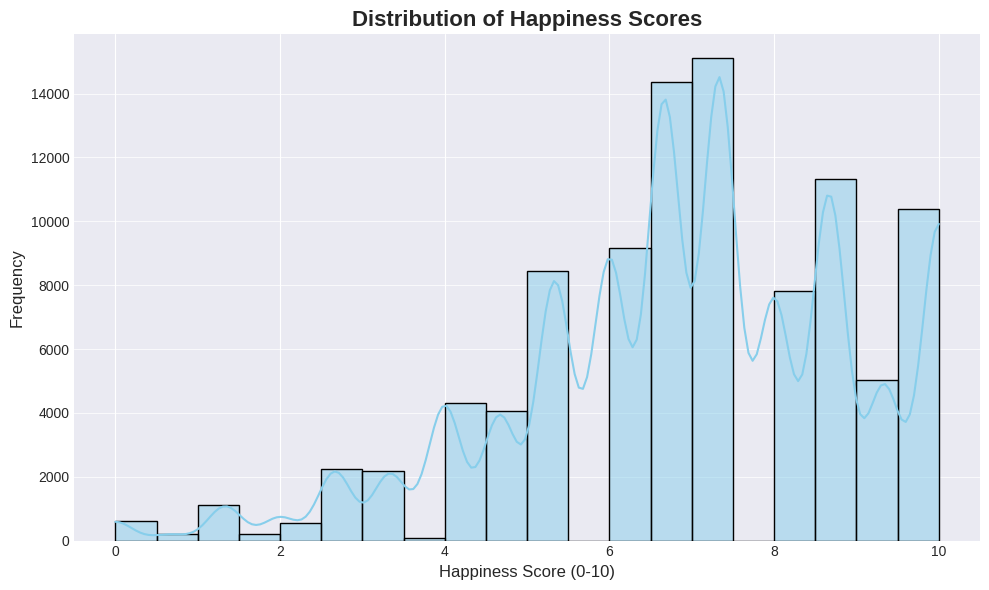

In [ ]:
# prompt: # prompt: show histogram of happiness beautifully

import matplotlib.pyplot as plt
import seaborn as sns

# Set a beautiful style for the plot
plt.style.use('seaborn-v0_8-darkgrid')

# Create the histogram
plt.figure(figsize=(10, 6)) # Adjust figure size for better readability
sns.histplot(df_cleaned_4['happiness'], bins=20, kde=True, color='skyblue', edgecolor='black') # Using seaborn for enhanced aesthetics

# Add titles and labels
plt.title('Distribution of Happiness Scores', fontsize=16, fontweight='bold')
plt.xlabel('Happiness Score (0-10)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Improve tick label appearance
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add a grid for better readability (seaborn darkgrid includes this)
plt.grid(axis='y', alpha=0.75)

# Show the plot
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

In [ ]:
# prompt: dfをhappiness_data_pre_grouping.csvとして保存

df_cleaned_4.to_csv('happiness_data_pre_cluster.csv', index=False)

#4. Grouping of variables

In [ ]:
%run dataset_grouping.ipynb

In [ ]:
cat = df_cleaned_4.loc[:, :'Q289']
num = df_cleaned_4.loc[:, 'Q1P':]

linkage method: average


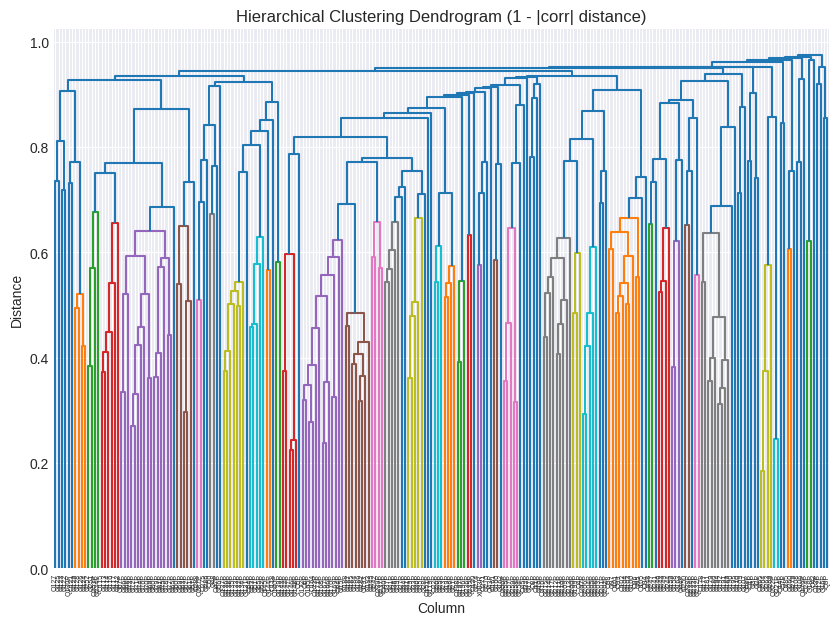

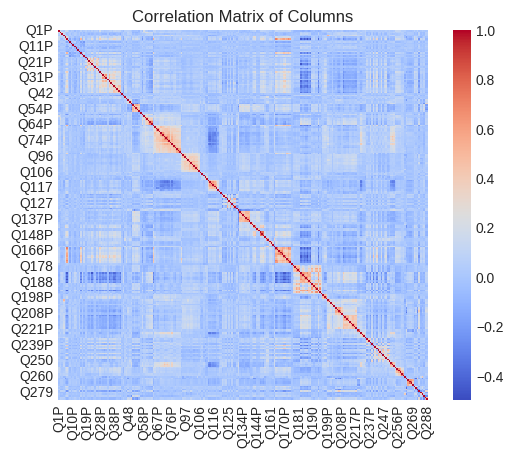

In [ ]:
linked = corr_matrix(num)

In [ ]:
cluster_set_0_75 = cluster_displey(linked, num, threshold_distance=0.75)
cluster_set_0_76 = cluster_displey(linked, num, threshold_distance=0.76)
cluster_set_0_765 = cluster_displey(linked, num, threshold_distance=0.765)
cluster_set_0_77 = cluster_displey(linked, num, threshold_distance=0.77)
cluster_set_0_775 = cluster_displey(linked, num, threshold_distance=0.775)
cluster_set_0_78 = cluster_displey(linked, num, threshold_distance=0.78)
cluster_set_0_8 = cluster_displey(linked, num, threshold_distance=0.8)

number of clusters: 79
number of clusters: 73
number of clusters: 72
number of clusters: 69
number of clusters: 63
number of clusters: 59
number of clusters: 57


In [ ]:
cluster_set_0_75

,Cluster,Feature
0,1,Q9P
1,2,Q16P
2,3,Q12P
3,4,Q13P
4,5,Q24P
...,...,...
230,77,Q130P
231,78,Q122
232,78,Q123
233,79,Q127


In [ ]:
cluster_set_0_76

,Cluster,Feature
0,1,Q9P
1,2,Q16P
2,3,Q12P
3,4,Q13P
4,5,Q24P
...,...,...
230,71,Q130P
231,72,Q122
232,72,Q123
233,73,Q127


In [ ]:
cluster_set_0_765

,Cluster,Feature
0,1,Q9P
1,2,Q16P
2,3,Q12P
3,4,Q13P
4,5,Q24P
...,...,...
230,70,Q130P
231,71,Q122
232,71,Q123
233,72,Q127


In [ ]:
cluster_set_0_77

,Cluster,Feature
0,1,Q9P
1,2,Q16P
2,3,Q12P
3,4,Q13P
4,5,Q24P
...,...,...
230,67,Q130P
231,68,Q122
232,68,Q123
233,69,Q127


In [ ]:
cluster_set_0_775

,Cluster,Feature
0,1,Q9P
1,2,Q16P
2,3,Q12P
3,4,Q13P
4,5,Q24P
...,...,...
230,61,Q128
231,62,Q122
232,62,Q123
233,63,Q127


In [ ]:
cluster_set_0_78

,Cluster,Feature
0,1,Q9P
1,2,Q16P
2,3,Q12P
3,4,Q13P
4,5,Q24P
...,...,...
230,57,Q128
231,58,Q122
232,58,Q123
233,59,Q127


In [ ]:
cluster_set_0_8

,Cluster,Feature
0,1,Q9P
1,2,Q16P
2,3,Q12P
3,4,Q13P
4,5,Q24P
...,...,...
230,55,Q128
231,56,Q122
232,56,Q123
233,57,Q127


#5.Cluster dataset

In [ ]:
clusters = cluster_set_0_765

In [ ]:
cluster_map = clusters.groupby('Cluster')['Feature'].apply(list)

In [ ]:
df_cleaned_4.head()

,happiness,B_COUNTRY_ALPHA,D_INTERVIEW,G_TOWNSIZE,GDP group,H_SETTLEMENT,Q111,Q273,Q281,Q289,...,Q269,Q270,Q271,Q274,Q275,Q279,Q285,Q286,Q287P,Q288
0,7.333333,CYP,196070011,6,1,4,2,1,6,3,...,1,2,1,2,1,1,1,2,3,5
1,8.000000,CYP,196070036,6,1,4,1,1,8,3,...,1,4,1,2,1,1,2,2,2,5
2,8.000000,CYP,196070039,6,1,4,1,1,0,3,...,1,6,1,4,4,5,2,2,3,3
3,5.333333,CYP,196070040,6,1,4,1,1,8,3,...,1,2,1,2,3,1,2,2,3,5
4,4.000000,CYP,196070053,6,1,4,2,5,8,3,...,1,8,1,3,3,1,2,2,1,3


In [ ]:
X = df_cleaned_4.loc[:, 'Q1P':]
X.head()

,Q1P,Q2P,Q3P,Q4P,Q5P,Q6P,Q7P,Q8P,Q9P,Q10P,...,Q269,Q270,Q271,Q274,Q275,Q279,Q285,Q286,Q287P,Q288
0,4,4,4,1,4,4,1,1,1,1,...,1,2,1,2,1,1,1,2,3,5
1,4,2,4,2,4,4,1,0,1,1,...,1,4,1,2,1,1,2,2,2,5
2,4,3,4,2,4,4,1,1,1,0,...,1,6,1,4,4,5,2,2,3,3
3,4,3,4,1,4,4,1,0,1,1,...,1,2,1,2,3,1,2,2,3,5
4,4,3,3,1,4,4,1,0,1,1,...,1,8,1,3,3,1,2,2,1,3


In [ ]:
df_z = (X - X.mean()) / X.std(ddof=0)

col2clu = clusters.set_index('Feature')['Cluster']

df_cluster_scores = (df_z
                     .groupby(col2clu, axis=1)
                     .mean()
                     .add_prefix('Cl_'))

In [ ]:
df_cluster_scores.head()

Cluster,Cl_1,Cl_2,Cl_3,Cl_4,Cl_5,Cl_6,Cl_7,Cl_8,Cl_9,Cl_10,...,Cl_63,Cl_64,Cl_65,Cl_66,Cl_67,Cl_68,Cl_69,Cl_70,Cl_71,Cl_72
0,0.936297,-0.623011,-1.308899,-0.65273,0.554899,0.037005,-1.779680,-1.346354,1.621333,-1.055389,...,-0.329112,-0.036732,0.849269,-1.577308,-1.675059,0.345000,0.976462,-1.848202,-1.456204,0.884878
1,0.936297,-0.623011,0.764001,-0.65273,0.554899,0.037005,-0.431733,-1.346354,-0.977642,0.280686,...,-0.678286,-0.036732,0.849269,-0.353992,0.580208,-0.332603,0.976462,-1.218074,-0.272563,0.884878
2,0.936297,-0.623011,0.764001,-0.65273,0.554899,0.037005,-0.431733,-1.346354,0.136204,0.931441,...,-0.155604,-0.036732,-1.478827,-0.144356,0.574066,0.146194,-0.200705,-0.266231,0.323946,0.268851
3,0.936297,-0.623011,0.764001,-0.65273,0.554899,0.037005,-1.779680,-0.009235,0.136204,0.280686,...,0.001968,-0.036732,0.849269,0.242906,-0.009851,0.143230,0.976462,-0.742153,-0.272563,0.884878
4,0.936297,-0.623011,0.764001,-0.65273,0.554899,0.037005,-1.779680,-1.346354,0.878768,0.280686,...,-1.019491,-0.036732,0.849269,-0.560633,0.507466,-0.300418,0.386842,0.839819,0.915767,0.268851


In [ ]:
df_cat = df_cleaned_4.loc[:, 'Q111':'Q289']
df_cat.columns = ['Cl_73', 'Cl_74', 'Cl_75', 'Cl_76']

In [ ]:
df_final = pd.concat([df_cleaned_4.loc[:, :'H_SETTLEMENT'], df_cluster_scores, df_cat], axis=1)
df_final.head()

,happiness,B_COUNTRY_ALPHA,D_INTERVIEW,G_TOWNSIZE,GDP group,H_SETTLEMENT,Cl_1,Cl_2,Cl_3,Cl_4,...,Cl_67,Cl_68,Cl_69,Cl_70,Cl_71,Cl_72,Cl_73,Cl_74,Cl_75,Cl_76
0,7.333333,CYP,196070011,6,1,4,0.936297,-0.623011,-1.308899,-0.65273,...,-1.675059,0.345000,0.976462,-1.848202,-1.456204,0.884878,2,1,6,3
1,8.000000,CYP,196070036,6,1,4,0.936297,-0.623011,0.764001,-0.65273,...,0.580208,-0.332603,0.976462,-1.218074,-0.272563,0.884878,1,1,8,3
2,8.000000,CYP,196070039,6,1,4,0.936297,-0.623011,0.764001,-0.65273,...,0.574066,0.146194,-0.200705,-0.266231,0.323946,0.268851,1,1,0,3
3,5.333333,CYP,196070040,6,1,4,0.936297,-0.623011,0.764001,-0.65273,...,-0.009851,0.143230,0.976462,-0.742153,-0.272563,0.884878,1,1,8,3
4,4.000000,CYP,196070053,6,1,4,0.936297,-0.623011,0.764001,-0.65273,...,0.507466,-0.300418,0.386842,0.839819,0.915767,0.268851,2,5,8,3


In [ ]:
df_final.to_csv('happiness_data.csv', index=False)